# **LIBRARIES** 


In [99]:
import pandas as pd
import numpy as np
from matplotlib import rcParams
rcParams['figure.figsize'] = 5,4
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import os
from os import listdir
import plotly.express as px
import cv2
from matplotlib.image import imread
import tensorflow as tf
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix
import glob
from PIL import Image
import random
random.seed(100)


### **Breast Cancer prediction with Mammographic Details**

In [113]:
data = pd.read_csv ('/Users/davissebi/Desktop/Dessertation code/mammographic_masses.csv')
print(data)

    Score Age Shape Margin Density  Malignant
0       0  45     2      4       3          0
1       0  69     4      5       3          1
2       0  58     4      4       3          0
3       0  72     4      3       3          1
4       0  71     4      4       3          1
..    ...  ..   ...    ...     ...        ...
956     6  71     4      4       3          1
957     6  68     4      3       3          1
958     6  72     4      3       3          1
959     6  40     ?      3       4          1
960     ?  66     ?      ?       1          1

[961 rows x 6 columns]


In [114]:
data.head()

,Score,Age,Shape,Margin,Density,Malignant
0,0,45,2,4,3,0
1,0,69,4,5,3,1
2,0,58,4,4,3,0
3,0,72,4,3,3,1
4,0,71,4,4,3,1


## **DETAILS ABOUT THE MAMMOGRAPHIC MASS DATA SET**

### 6 Attributes in total (1 goal field, 1 non-predictive, 4 predictive attributes)

1. *BI-RADS assessment (Score)*: 1 to 5 (ordinal, non-predictive!)  
2. *Age*: patient's age in years (integer)
3. *Shape*: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
4. *Margin*: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
5. *Density*: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
6. *Severity (Maligant)*: benign=0 or malignant=1 (binominal, goal field!)


### Missing Attribute Values:
    - BI-RADS assessment:    2
    - Age:                   5
    - Shape:                31
    - Margin:               48
    - Density:              76
    - Severity:              0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Score      961 non-null    object
 1   Age        961 non-null    object
 2   Shape      961 non-null    object
 3   Margin     961 non-null    object
 4   Density    961 non-null    object
 5   Malignant  961 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 45.2+ KB


In [116]:
data.describe()

,Malignant
count,961.000000
mean,0.463059
std,0.498893
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


### ***Data Pre Processing***

In [117]:
# Replace the '?' symbols with NaN values
data = data.replace('?', np.nan)

print(data)

    Score Age Shape Margin Density  Malignant
0       0  45     2      4       3          0
1       0  69     4      5       3          1
2       0  58     4      4       3          0
3       0  72     4      3       3          1
4       0  71     4      4       3          1
..    ...  ..   ...    ...     ...        ...
956     6  71     4      4       3          1
957     6  68     4      3       3          1
958     6  72     4      3       3          1
959     6  40   NaN      3       4          1
960   NaN  66   NaN    NaN       1          1

[961 rows x 6 columns]


In [118]:
# dealing with the missing value by eliminating the rows having the missing values 
data.dropna(inplace=True)
data

,Score,Age,Shape,Margin,Density,Malignant
0,0,45,2,4,3,0
1,0,69,4,5,3,1
2,0,58,4,4,3,0
3,0,72,4,3,3,1
4,0,71,4,4,3,1
...,...,...,...,...,...,...
954,6,80,4,5,3,1
955,6,51,4,4,3,1
956,6,71,4,4,3,1
957,6,68,4,3,3,1


In [119]:
columns_to_convert_to_float = ['Score','Age', 'Shape', 'Margin', 'Density', 'Malignant']

for column in columns_to_convert_to_float:
    data[column] = data[column].astype(float)

data.describe()

,Score,Age,Shape,Margin,Density,Malignant
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


<Axes: >

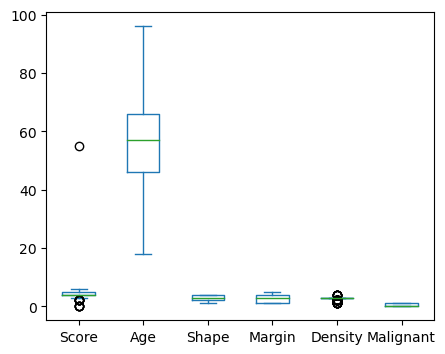

In [120]:
data.plot(kind='box')

In [121]:
data = data.drop(data[data['Score'] == 55].index)
data = data.drop(data[data['Score'] == 0].index)

<Axes: >

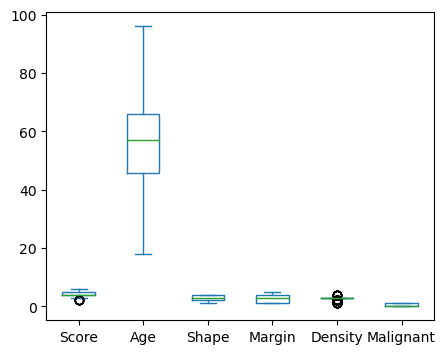

In [122]:
data.plot(kind='box')

### **Splitting the Data set for testing and training purposes**

In [123]:
y=data.Malignant
X = data.loc[:,['Score','Age','Shape','Margin','Density']]

In [124]:
X.head()

,Score,Age,Shape,Margin,Density
8,2.0,76.0,1.0,1.0,2.0
9,2.0,57.0,1.0,1.0,3.0
10,2.0,40.0,1.0,1.0,3.0
11,2.0,23.0,1.0,1.0,3.0
12,2.0,49.0,2.0,1.0,2.0


In [125]:
scaler = preprocessing.StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [126]:
print(scaler.transform(X))

[[-3.92523074  1.37946461 -1.42931697 -1.15138278 -2.60012367]
 [-3.92523074  0.08515214 -1.42931697 -1.15138278  0.24139079]
 [-3.92523074 -1.07291692 -1.42931697 -1.15138278  0.24139079]
 ...
 [ 2.72989299  1.03885606  0.98576953  0.76139829  0.24139079]
 [ 2.72989299  0.83449093  0.98576953  0.1238046   0.24139079]
 [ 2.72989299  1.10697777  0.98576953  0.1238046   0.24139079]]


<Axes: ylabel='Frequency'>

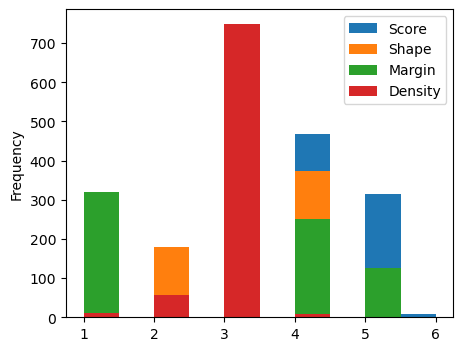

In [127]:
data.loc[:,['Score','Shape','Margin','Density']].plot(kind='hist')
 #Age is excluded due to size of elements in Age is really high as compared to other elements

In [128]:
X.tail()

,Score,Age,Shape,Margin,Density
954,6.0,80.0,4.0,5.0,3.0
955,6.0,51.0,4.0,4.0,3.0
956,6.0,71.0,4.0,4.0,3.0
957,6.0,68.0,4.0,3.0,3.0
958,6.0,72.0,4.0,3.0,3.0


In [129]:
X.shape

(824, 5)

In [130]:
y.tail()

954    1.0
955    1.0
956    1.0
957    1.0
958    1.0
Name: Malignant, dtype: float64

In [131]:
y.shape

(824,)

## splitting into testing and training Data

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3,
                                                    random_state=3)

## **Random Forest Model**



In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a wider parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a RandomForestClassifier
classifier = RandomForestClassifier(random_state=20, criterion='gini', n_jobs=-1)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator from GridSearchCV
best_classifier_RF = grid_search.best_estimator_

# Print the best hyperparameters for Random Forest
best_params_RF = grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(best_params_RF)

# Fit the best classifier on the training data
best_classifier_RF.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = best_classifier_RF.predict(X_test)

# Calculate accuracy
accuracy_RF = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy score =", accuracy_RF, "%")

# Generate a classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Generate a confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))



Best Hyperparameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy score = 86.69354838709677 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       142
         1.0       0.82      0.89      0.85       106

    accuracy                           0.87       248
   macro avg       0.86      0.87      0.87       248
weighted avg       0.87      0.87      0.87       248

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 121                  21
Actual Positive                  12                  94


## **Decision Tree Model**

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  
}

# Create a DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=13)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator from GridSearchCV
best_classifier_DT = grid_search.best_estimator_

# Get the best hyperparameters
best_params_DT = grid_search.best_params_
print("Best Hyperparameters:", best_params_DT)

# Fit the best classifier on the training data
best_classifier_DT.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = best_classifier_DT.predict(X_test)

# Calculate accuracy
accuracy_DT = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy score =", accuracy_DT, "%")

# Generate a classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Generate a confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))





Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy score = 85.48387096774194 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       142
         1.0       0.81      0.86      0.83       106

    accuracy                           0.85       248
   macro avg       0.85      0.86      0.85       248
weighted avg       0.86      0.85      0.86       248

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 121                  21
Actual Positive                  15                  91


## **KNN Model**

In [137]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNeighborsClassifier
classifier = KNeighborsClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(classifier, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best estimator from GridSearchCV
best_classifier_KNN = grid_search.best_estimator_

# Get the best hyperparameters
best_params_KNN = grid_search.best_params_
print("Best Hyperparameters:", best_params_KNN)

# Fit the best KNN classifier on the training data
best_classifier_KNN.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred_knn = best_classifier_KNN.predict(X_test)

# Calculate accuracy
accuracy_KNN = accuracy_score(Y_test, Y_pred_knn) * 100
print("K-Nearest Neighbors Accuracy score =", accuracy_KNN, "%")

# Generate a classification report
print("K-Nearest Neighbors Classification Report:\n", classification_report(Y_test, Y_pred_knn))

# Generate a confusion matrix
confusion_knn = confusion_matrix(Y_test, Y_pred_knn)
print("K-Nearest Neighbors Confusion Matrix:\n", pd.DataFrame(confusion_knn, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))





Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
K-Nearest Neighbors Accuracy score = 81.45161290322581 %
K-Nearest Neighbors Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.79      0.83       142
         1.0       0.75      0.85      0.80       106

    accuracy                           0.81       248
   macro avg       0.81      0.82      0.81       248
weighted avg       0.82      0.81      0.82       248

K-Nearest Neighbors Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 112                  30
Actual Positive                  16                  90


## **Naive Bayes Model**

In [139]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
classifier = GaussianNB()

# Fit the classifier on the training data
classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy_NB = accuracy_score(Y_test, Y_pred) * 100
print("Accuracy score =", accuracy_NB, "%")

# Generate a classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Generate a confusion matrix
confusion = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))




Accuracy score = 84.2741935483871 %
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       142
         1.0       0.78      0.88      0.83       106

    accuracy                           0.84       248
   macro avg       0.84      0.85      0.84       248
weighted avg       0.85      0.84      0.84       248

Confusion Matrix:
                  Predicted Negative  Predicted Positive
Actual Negative                 116                  26
Actual Positive                  13                  93


### **Model Comparision**

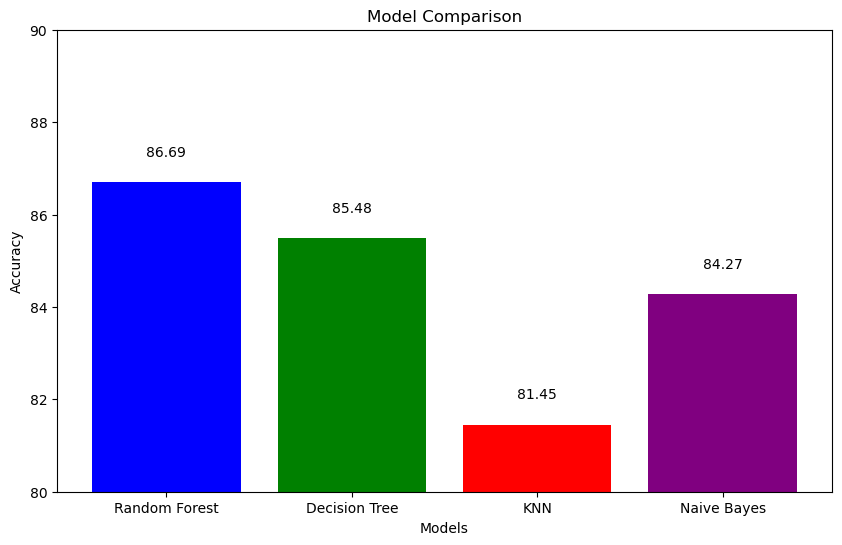

In [145]:
# Create a list of model names
model_names = ['Random Forest', 'Decision Tree','KNN', 'Naive Bayes']

# Create a list of accuracy scores
accuracy_scores = [accuracy_RF, accuracy_DT,accuracy_KNN, accuracy_NB]

# Create a bar plot to compare the accuracy of the models
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])  # Add a color for the fourth model
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Annotate the bars with accuracy values
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.5, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(80, 90)  # Set the y-axis range to cover a larger range of values
plt.show()


**---------------------------------------------------------------------------------------------------------------**

# **Breast Cancer prediction with Image Dataset**

## **Importing Mini CBIS DDSM Dataset and Histopathological Dataset**

In [27]:
#CBIS DDSM dataset
cb_data_info = pd.read_excel('/Users/davissebi/Desktop/Dessertation Code/Mini CBIS-DDSM/MINI-DDSM-Complete-JPEG-8/DataWMask.xlsx')

# Benign Dataset
cb_benign_img = '/Users/davissebi/Desktop/Dessertation Code/Mini CBIS-DDSM/MINI-DDSM-Complete-JPEG-8/Benign'

benign_jpg_file_paths = []

for root, dirs, files in os.walk(cb_benign_img):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            benign_jpg_file_paths.append(os.path.join(root, file))



#Cancer Dataset
cb_cancer_img = '/Users/davissebi/Desktop/Dessertation Code/Mini CBIS-DDSM/MINI-DDSM-Complete-JPEG-8/Cancer'

cancer_jpg_file_paths = []

for root, dirs, files in os.walk(cb_cancer_img):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            cancer_jpg_file_paths.append(os.path.join(root, file))
            
#Normal Dataset
cb_normal_img = '/Users/davissebi/Desktop/Dessertation Code/Mini CBIS-DDSM/MINI-DDSM-Complete-JPEG-8/Normal'

normal_jpg_file_paths = []

for root, dirs, files in os.walk(cb_normal_img):
    for file in files:
        if (file.endswith('.jpg') or file.endswith('.JPG')) and not (file.endswith('_Mask.jpg') or file.endswith('_MASK2.jpg')):
            normal_jpg_file_paths.append(os.path.join(root, file))

In [28]:
# Histopathological Dataset
breast_imgs = glob.glob('/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [29]:
cb_data_info.head()

,fullPath,fileName,View,Side,Status,Tumour_Contour,Tumour_Contour2,Age,Density
0,Benign\0029\C_0029_1.LEFT_CC.jpg,C_0029_1.LEFT_CC.jpg,CC,LEFT,Benign,Benign\0029\C_0029_1.LEFT_CC_Mask.jpg,-,66.0,3
1,Benign\0029\C_0029_1.LEFT_MLO.jpg,C_0029_1.LEFT_MLO.jpg,MLO,LEFT,Benign,Benign\0029\C_0029_1.LEFT_MLO_Mask.jpg,-,66.0,3
2,Benign\0029\C_0029_1.RIGHT_CC.jpg,C_0029_1.RIGHT_CC.jpg,CC,RIGHT,Benign,-,-,66.0,3
3,Benign\0029\C_0029_1.RIGHT_MLO.jpg,C_0029_1.RIGHT_MLO.jpg,MLO,RIGHT,Benign,-,-,66.0,3
4,Benign\0033\C_0033_1.LEFT_CC.jpg,C_0033_1.LEFT_CC.jpg,CC,LEFT,Benign,-,-,60.0,3


In [30]:
cb_data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fullPath         7808 non-null   object 
 1   fileName         7808 non-null   object 
 2   View             7808 non-null   object 
 3   Side             7808 non-null   object 
 4   Status           7808 non-null   object 
 5   Tumour_Contour   7808 non-null   object 
 6   Tumour_Contour2  7808 non-null   object 
 7   Age              7796 non-null   float64
 8   Density          7808 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 549.1+ KB


### **Data Pre Processing and Visualization**



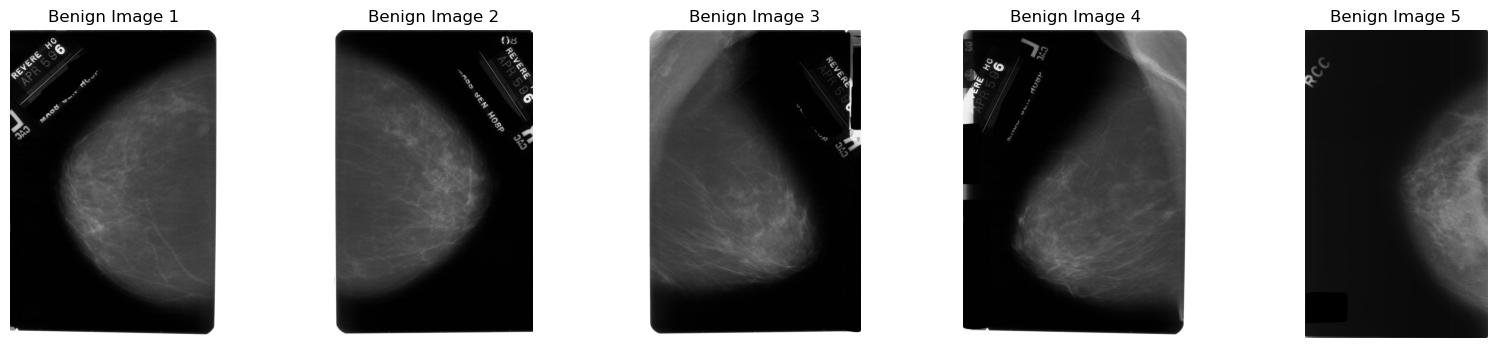

In [31]:
# Visualize the first 5 images in the benign dataset

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, benign_jpg_file_path in enumerate(benign_jpg_file_paths[:5]):
    image = cv2.imread(benign_jpg_file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image in the i-th subplot
    axes[i].imshow(image_rgb)
    axes[i].set_title(f'Benign Image {i+1}')
    axes[i].axis('off')

plt.show()

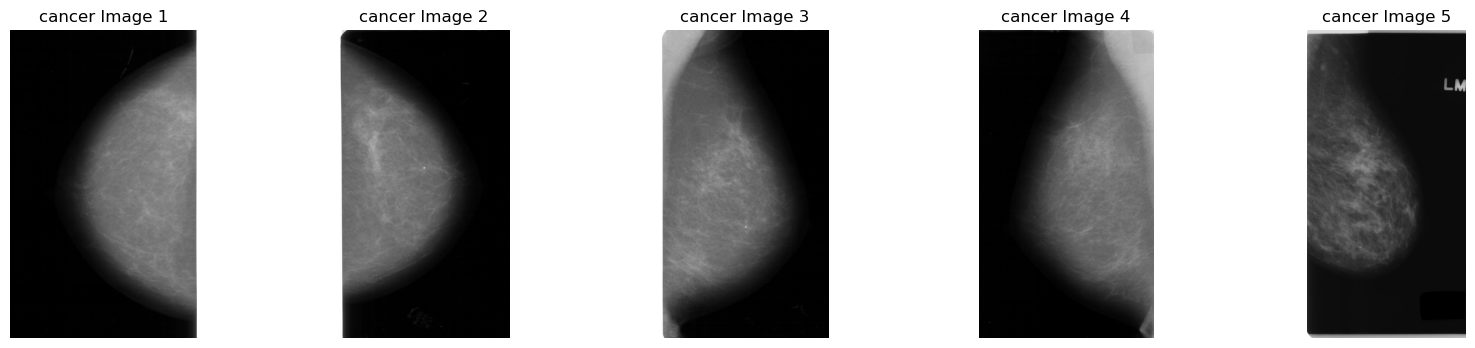

In [32]:
# Visualize the first 5 images in the Cancer dataset

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, cancer_jpg_file_path in enumerate(cancer_jpg_file_paths[:5]):
    image = cv2.imread(cancer_jpg_file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image in the i-th subplot
    axes[i].imshow(image_rgb)
    axes[i].set_title(f'cancer Image {i+1}')
    axes[i].axis('off')

plt.show()

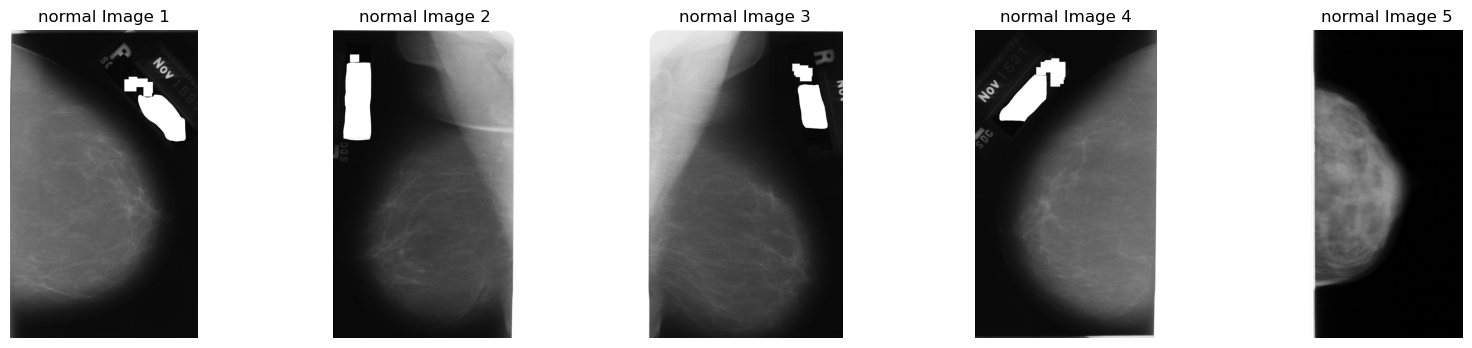

In [33]:
# Visualize the first 5 images in the Normal dataset

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i, normal_jpg_file_path in enumerate(normal_jpg_file_paths[:5]):
    image = cv2.imread(normal_jpg_file_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image in the i-th subplot
    axes[i].imshow(image_rgb)
    axes[i].set_title(f'normal Image {i+1}')
    axes[i].axis('off')

plt.show()

**Data Cleaning**

In [34]:
#Removing unwanted details
cb_data_info.drop(['Tumour_Contour',	'Tumour_Contour2'],axis =1, inplace=True) 

In [35]:
cb_data_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fullPath  7808 non-null   object 
 1   fileName  7808 non-null   object 
 2   View      7808 non-null   object 
 3   Side      7808 non-null   object 
 4   Status    7808 non-null   object 
 5   Age       7796 non-null   float64
 6   Density   7808 non-null   int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 427.1+ KB


In [36]:
cb_data_info.isna().sum()

fullPath     0
fileName     0
View         0
Side         0
Status       0
Age         12
Density      0
dtype: int64

In [37]:
# Calculate the mean of the 'Age' column
age_mean = cb_data_info['Age'].mean()

# Fill NaN values in the 'Age' column with the mean value
cb_data_info['Age'].fillna(age_mean, inplace=True)

# Now the 'Age' column should have NaN values replaced with the mean value


In [38]:
cb_data_info.isna().sum()

fullPath    0
fileName    0
View        0
Side        0
Status      0
Age         0
Density     0
dtype: int64

In [39]:
# number of benign, Cancer and Normal
status_counts = cb_data_info['Status'].value_counts()
print(status_counts)


Status
Cancer    2716
Benign    2684
Normal    2408
Name: count, dtype: int64


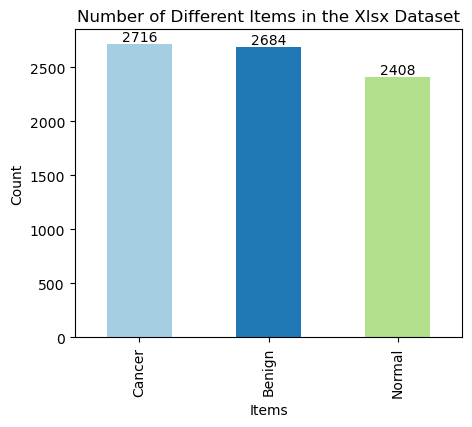

In [40]:
# Create a bar graph
colors = plt.cm.Paired(range(len(status_counts)))
status_counts.plot(kind='bar', color=colors)

# Add labels and titles
plt.xlabel('Items')
plt.ylabel('Count')
plt.title('Number of Different Items in the Xlsx Dataset')

# Add labels with numbers above each bar
for i, v in enumerate(status_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the graph
plt.show()

In [41]:
# Count the number of images in each category
num_benign_images = len(benign_jpg_file_paths)
num_cancer_images = len(cancer_jpg_file_paths)
num_normal_images = len(normal_jpg_file_paths)

# Print the counts
print(f'Number of Benign images: {num_benign_images}')
print(f'Number of Cancer images: {num_cancer_images}')
print(f'Number of Normal images: {num_normal_images}')


Number of Benign images: 2684
Number of Cancer images: 2862
Number of Normal images: 2408


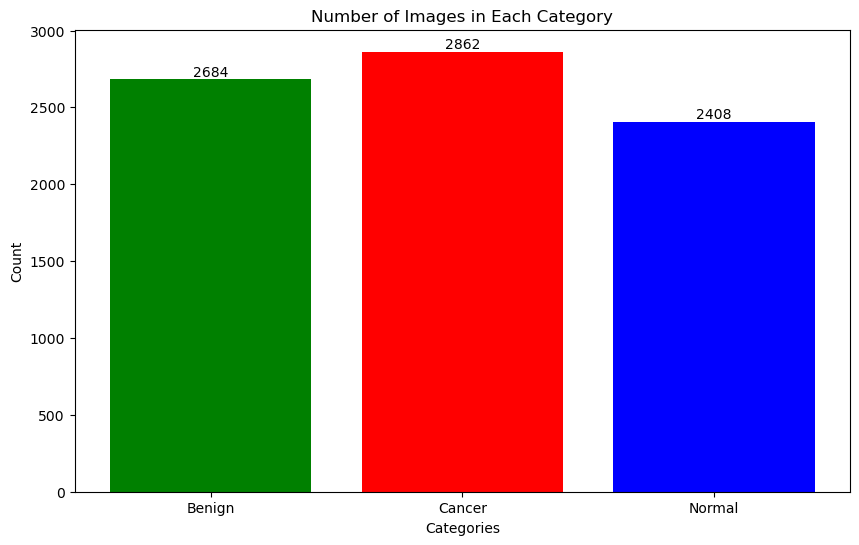

In [42]:
# graph plotting

# Define the categories and their counts
categories = ['Benign', 'Cancer', 'Normal']
counts = [num_benign_images, num_cancer_images, num_normal_images]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['green', 'red', 'blue'])

# Add labels and titles
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Number of Images in Each Category')

# Add labels with numbers above each bar
for i, v in enumerate(counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Show the graph
plt.show()

**Image Resizing and Normalization**

In [43]:
# image resizing

desired_width = 200
desired_height = 200

resized_benign_images = []
for image_path in benign_jpg_file_paths:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_benign_images.append(resized_image)

resized_malignant_images = []
for image_path in cancer_jpg_file_paths:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_malignant_images.append(resized_image)  

resized_normal_images = []
for image_path in normal_jpg_file_paths:
    image = cv2.imread(image_path)
    resized_image = cv2.resize(image, (desired_width, desired_height))
    resized_normal_images.append(resized_image)    

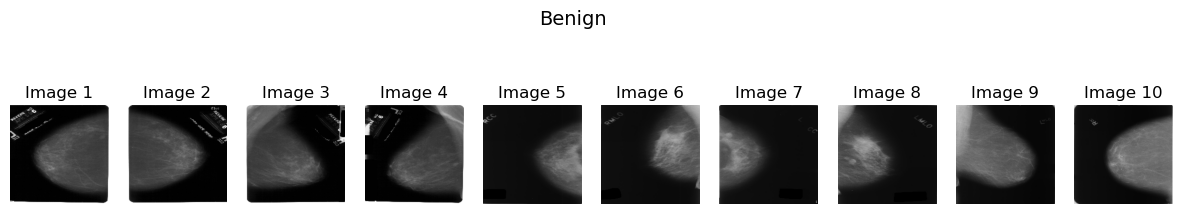

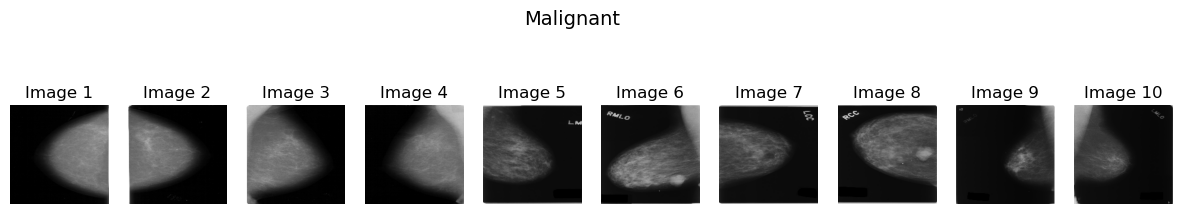

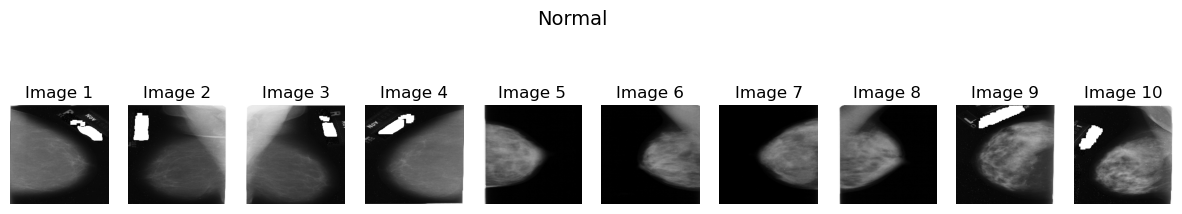

In [44]:
# Function to display images horizontally
def display_images_horizontally(images, title):
    plt.figure(figsize=(15, 3))
    num_images_to_display = min(len(images), 10)

    for i in range(num_images_to_display):
        plt.subplot(1, num_images_to_display, i + 1)
        plt.imshow(images[i])
        plt.title(f'Image {i+1}')
        plt.axis('off')
    
    plt.suptitle(title, fontsize=14)
    plt.show()

# Display 10 images from each of the resized image lists
display_images_horizontally(resized_benign_images, "Benign")
display_images_horizontally(resized_malignant_images, "Malignant")
display_images_horizontally(resized_normal_images, "Normal")

In [45]:

# Normalize the pixel values to the [0, 1] range

normalized_benign_images = []
for image in resized_benign_images:
    # Convert pixel values to float and scale to [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    normalized_benign_images.append(normalized_image)

normalized_malignant_images = []
for image in resized_malignant_images:
    # Convert pixel values to float and scale to [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    normalized_malignant_images.append(normalized_image)    

normalized_normal_images = []
for image in resized_normal_images:
    # Convert pixel values to float and scale to [0, 1]
    normalized_image = image.astype(np.float32) / 255.0
    normalized_normal_images.append(normalized_image)    

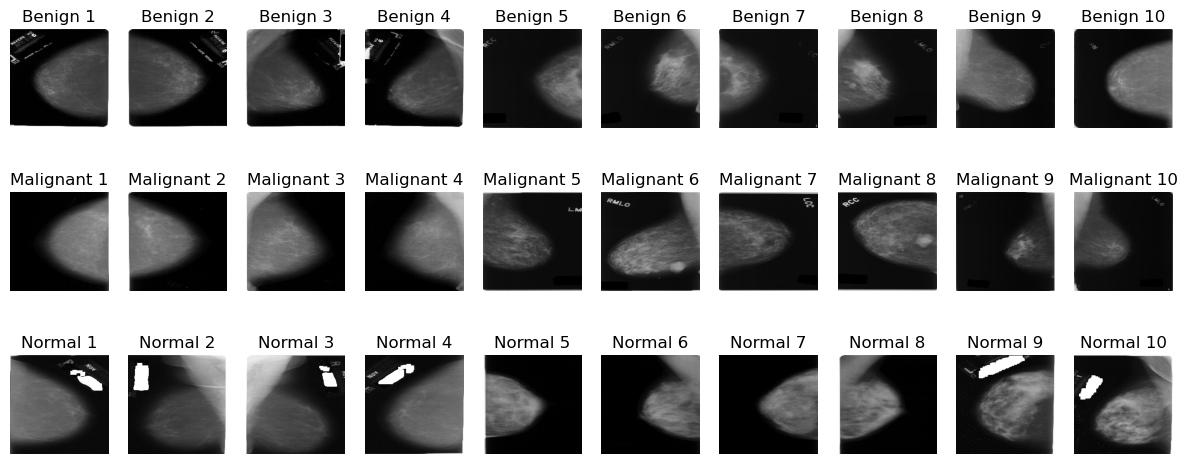

In [46]:
# Choose the number of images to display from each category
num_images_to_display = 10

# Create a figure with a horizontal layout
plt.figure(figsize=(15, 6))

# Display 10 images from the Benign category
for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, i + 1)
    plt.imshow(normalized_benign_images[i])
    plt.title(f'Benign {i+1}')
    plt.axis('off')

# Display 10 images from the Malignant category
for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, num_images_to_display + i + 1)
    plt.imshow(normalized_malignant_images[i])
    plt.title(f'Malignant {i+1}')
    plt.axis('off')

# Display 10 images from the Normal category
for i in range(num_images_to_display):
    plt.subplot(3, num_images_to_display, 2*num_images_to_display + i + 1)
    plt.imshow(normalized_normal_images[i])
    plt.title(f'Normal {i+1}')
    plt.axis('off')

# Show the images in a horizontal layout
plt.show()

## **For Histopathological dataset**

In [47]:
for imgname in breast_imgs[:5]:
    print(imgname)

/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/9036/0/9036_idx5_x1051_y2401_class0.png
/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/9036/0/9036_idx5_x2951_y951_class0.png
/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3001_y1451_class0.png
/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/9036/0/9036_idx5_x3051_y801_class0.png
/Users/davissebi/Desktop/Dessertation Code/Histopathology image/IDC_regular_ps50_idx5/9036/0/9036_idx5_x951_y1901_class0.png


In [48]:
non_cancer_imgs = []
cancer_imgs = []

for image_path in breast_imgs:
    if image_path.endswith("class0.png"):
        non_cancer_imgs.append(image_path)
    elif image_path.endswith("class1.png"):
        cancer_imgs.append(image_path)




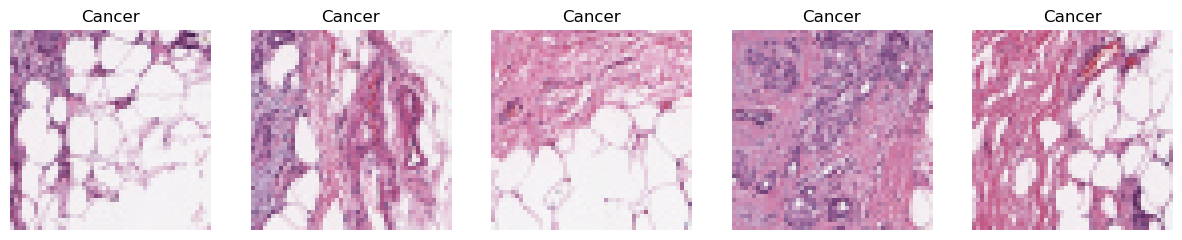

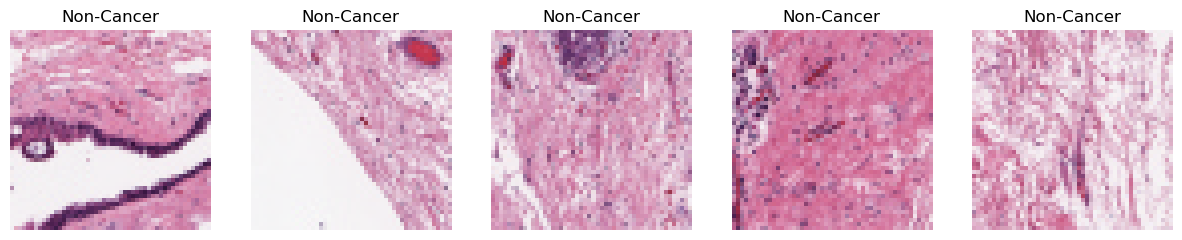

In [49]:
# Function to display a list of images
def display_images(image_list, title):
    fig, axes = plt.subplots(1, len(image_list), figsize=(15, 5))
    for i, image_path in enumerate(image_list):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis('off')
    plt.show()

# Display the first 5 cancer images
display_images(cancer_imgs[:5], title="Cancer")

# Display the first 5 non-cancer images
display_images(non_cancer_imgs[:5], title="Non-Cancer")

In [50]:
non_cancer_num = len(non_cancer_imgs)  # No cancer
cancer_num = len(cancer_imgs)   # Cancer 
        
total_img_num = non_cancer_num + cancer_num
        
print('Number of Images of no cancer: {}' .format(non_cancer_num))   # images of Non cancer
print('Number of Images of cancer : {}' .format(cancer_num))   # images of cancer 
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


**Image resizing and Normalization**

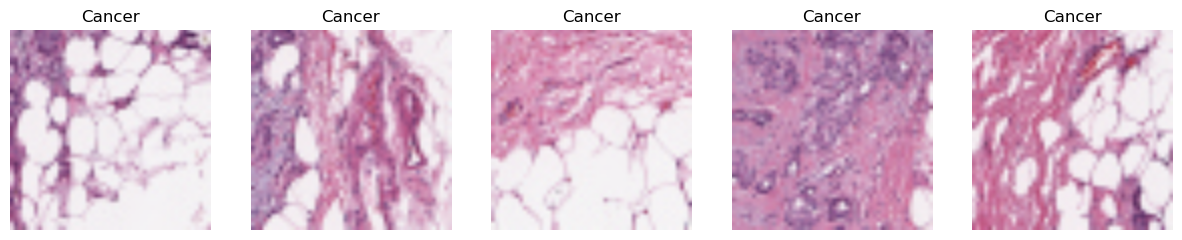

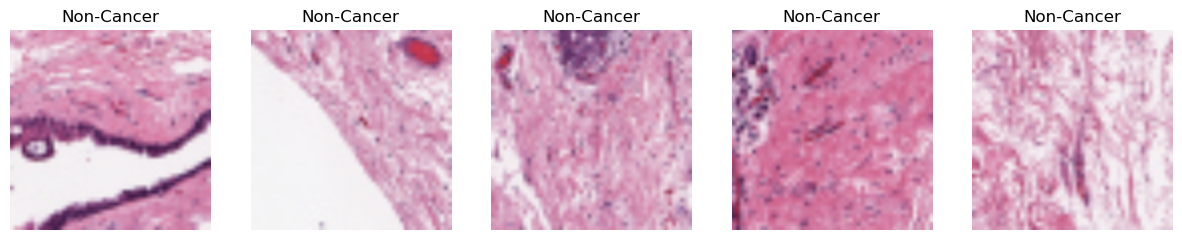

In [51]:
# Function to display a list of images with resizing and normalization
def display_resized_images(image_list, title, desired_width=200, desired_height=200):
    fig, axes = plt.subplots(1, len(image_list), figsize=(15, 5))
    
    for i, image_path in enumerate(image_list):
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Resize the image
        image = cv2.resize(image, (desired_width, desired_height))
        
        axes[i].imshow(image)
        axes[i].set_title(title)
        axes[i].axis('off')
    
    plt.show()

# Display the first 5 cancer images (resized)
display_resized_images(cancer_imgs[:5], title="Cancer")

# Display the first 5 non-cancer images (resized)
display_resized_images(non_cancer_imgs[:5], title="Non-Cancer")

# **Data Modeling**

In [52]:

fixed_size = (50, 50)

# Combine the data from Mini CBIS DDSM and Histopathological datasets
combined_data = []
combined_labels = []

# Add Mini CBIS DDSM data (benign, malignant, and normal images)
for img in normalized_benign_images:
    combined_data.append(img)
    combined_labels.append(1)  # 1 for cancer

for img in normalized_malignant_images:
    combined_data.append(img)
    combined_labels.append(2)  # 2 for malignant

for img in normalized_normal_images:
    combined_data.append(img)
    combined_labels.append(0)  # 0 for non cancer

# Add Histopathological data (cancer and non-cancer images)
for img in cancer_imgs:
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image, (50, 50), interpolation=cv2.INTER_LINEAR)
    combined_data.append(resized_image)
    combined_labels.append(1)  # 1 for cancer

for img in non_cancer_imgs:
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    resized_image = cv2.resize(image, (50, 50), interpolation=cv2.INTER_LINEAR)
    combined_data.append(resized_image)
    combined_labels.append(0)  # 0 for non cancer

# Shuffle the combined dataset to ensure randomness
combined_dataset = list(zip(combined_data, combined_labels))
random.shuffle(combined_dataset)
combined_data, combined_labels = zip(*combined_dataset)

# Now, it is a combined dataset with original labels:
# Label 0: Normal and Non-Cancer, Label 1: Cancer, Label 2: Malignant




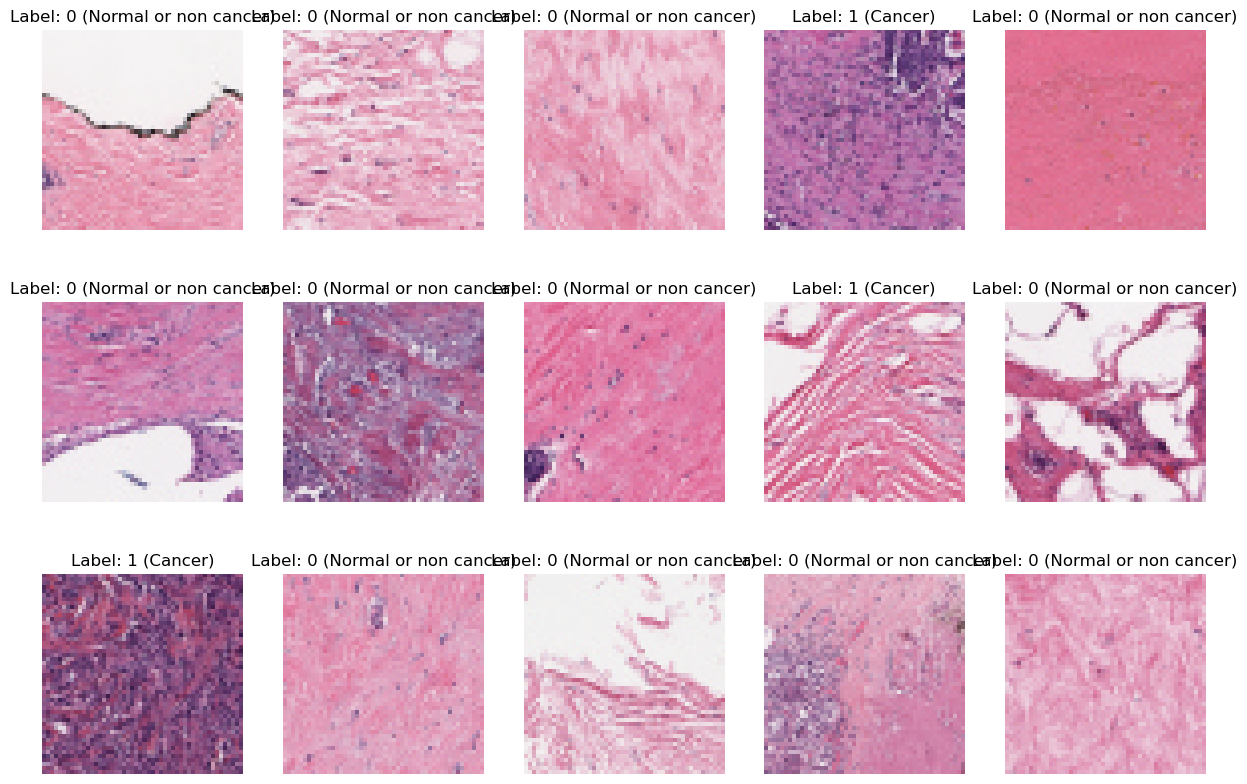

In [53]:
# Select 15 random images from combined_data
random_sample_indices = random.sample(range(len(combined_data)), 15)

# Define label names for interpretation
label_names = {0: "Normal or non cancer", 1: "Cancer", 2: "Malignant"}

# Create a 3x5 grid for displaying images
plt.figure(figsize=(15, 10))
for i, index in enumerate(random_sample_indices, 1):
    img = combined_data[index]
    label = combined_labels[index]
    
    # Display the image
    plt.subplot(3, 5, i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Label: {label} ({label_names[label]})")
    plt.axis('off')

plt.show()

In [54]:
# Define the target image size
fixed_size = (50, 50)

# Initialize empty lists to store images and labels
X = []  # List for image data
y = []  # List for labels

# Loop through each element in the combined dataset
for img, label in zip(combined_data, combined_labels):
    # Resize and preprocess the image to a fixed size
    img = cv2.resize(img, fixed_size, interpolation=cv2.INTER_LINEAR)
    # Append the image data (feature) to the 'X' list
    X.append(img)
    # Append the label to the 'y' list
    y.append(label)

# Convert the lists 'X' and 'y' into NumPy arrays
X = np.array(X)
y = np.array(y)

# Print the shape of the 'X' array
print('X shape:', X.shape)
print('Y shape:', y.shape)


X shape: (285478, 50, 50, 3)
Y shape: (285478,)


**Train and Test Splitting**

In [55]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Split the dataset into training and testing sets, with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Convert the categorical labels in 'y_train' and 'y_test' to one-hot encoded format
num_classes = 3  # Set this to the actual number of classes in your dataset
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



X_train shape: (199834, 50, 50, 3)
X_test shape: (85644, 50, 50, 3)
y_train shape: (199834, 3)
y_test shape: (85644, 3)


**Data Augmentation**

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create data generators for training and testing
train_datagen = datagen.flow(X_train, y_train, batch_size=32)
test_datagen = datagen.flow(X_test, y_test, batch_size=32, shuffle=False)

In [57]:
# Define an EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',          # Monitor the validation loss
    patience=5,                  # Number of epochs with no improvement after which training will be stopped
    min_delta=1e-7,              # Minimum change in the monitored quantity to be considered an improvement
    restore_best_weights=True,   # Restore model weights from the epoch with the best value of monitored quantity
)

# Define a ReduceLROnPlateau callback
plateau = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Monitor the validation loss
    factor=0.2,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=2,           # Number of epochs with no improvement after which learning rate will be reduced
    min_delta=1e-7,       # Minimum change in the monitored quantity to trigger a learning rate reduction
    cooldown=0,           # Number of epochs to wait before resuming normal operation after learning rate reduction
    verbose=1             # Verbosity mode (1: update messages, 0: no messages)
)

**CNN Mode**

In [58]:

from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Set a random seed for reproducibility
tf.random.set_seed(42)

# Input layer
input_layer = tf.keras.layers.Input(shape=(50, 50, 3), name='input_layer')

# Convolutional layers
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', name='conv1')(input_layer)
x = tf.keras.layers.BatchNormalization(name='bn1')(x)
x = tf.keras.layers.MaxPooling2D(strides=2, name='maxpool1')(x)

x = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name='conv2')(x)
x = tf.keras.layers.BatchNormalization(name='bn2')(x)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, name='maxpool2')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv3')(x)
x = tf.keras.layers.BatchNormalization(name='bn3')(x)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, name='maxpool3')(x)

x = tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name='conv4')(x)
x = tf.keras.layers.BatchNormalization(name='bn4')(x)
x = tf.keras.layers.MaxPooling2D((3, 3), strides=2, name='maxpool4')(x)

# Global Average Pooling layer
x = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pool')(x)

# Fully connected layers
x = tf.keras.layers.Dense(128, activation='relu', name='dense1')(x)
x = tf.keras.layers.Dropout(0.3, name='dropout')(x)

# Output layer (for multiclass classification)
num_classes = 3  # Number of classes (0, 1, 2)
output_layer = Dense(num_classes, activation='softmax', name='output')(x)

# Create the CNN model
cnn_model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer, name='CNN_Model')

# Compile the model for multiclass classification
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
cnn_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Display the model summary
cnn_model.summary()




Model: "CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 50, 50, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 50, 50, 32)        896       
                                                                 
 bn1 (BatchNormalization)    (None, 50, 50, 32)        128       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 25, 25, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 25, 25, 64)        18496     
                                                                 
 bn2 (BatchNormalization)    (None, 25, 25, 64)        256       
                                                                 
 maxpool2 (MaxPooling2D)     (None, 12, 12, 64)        0 

In [59]:
history_cnn = cnn_model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 25,
                    batch_size = 75,
                    callbacks=[early_stopping, plateau])

Epoch 1/25


2023-10-27 04:42:32.100814: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


2665/2665 [==============================] - 229s 85ms/step - loss: 0.3621 - accuracy: 0.8433 - val_loss: 0.4092 - val_accuracy: 0.8294 - lr: 0.0010
Epoch 2/25
2665/2665 [==============================] - 229s 86ms/step - loss: 0.3213 - accuracy: 0.8619 - val_loss: 0.3823 - val_accuracy: 0.8395 - lr: 0.0010
Epoch 3/25
2665/2665 [==============================] - 224s 84ms/step - loss: 0.3081 - accuracy: 0.8681 - val_loss: 0.6470 - val_accuracy: 0.7946 - lr: 0.0010
Epoch 4/25
2665/2665 [==============================] - 223s 84ms/step - loss: 0.2958 - accuracy: 0.8726 - val_loss: 0.3587 - val_accuracy: 0.8646 - lr: 0.0010
Epoch 5/25
2665/2665 [==============================] - 223s 84ms/step - loss: 0.2859 - accuracy: 0.8774 - val_loss: 0.8528 - val_accuracy: 0.6914 - lr: 0.0010
Epoch 6/25
2664/2665 [============================>.] - ETA: 0s - loss: 0.2774 - accuracy: 0.8802
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2665/2665 [=========================

In [60]:
cnn_model.evaluate(X_test,y_test)

2677/2677 [==============================] - 26s 10ms/step - loss: 0.2592 - accuracy: 0.8914


[0.2592455744743347, 0.8914459943771362]

2677/2677 [==============================] - 26s 10ms/step


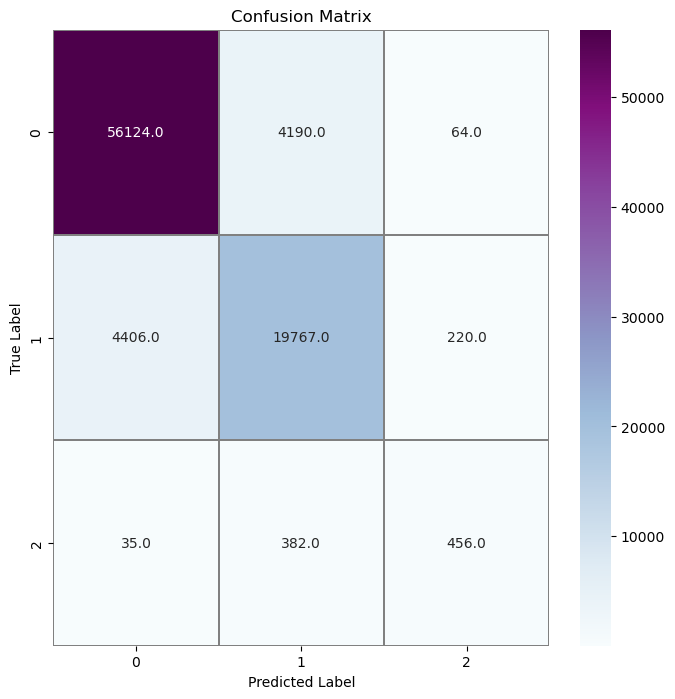

In [61]:
Y_pred = cnn_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

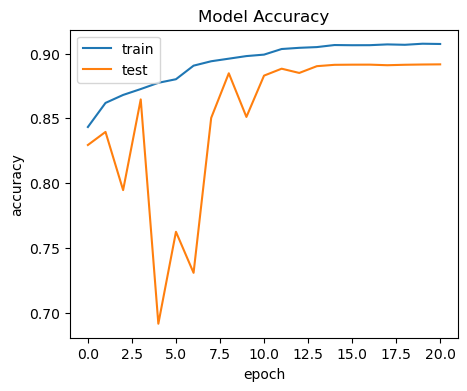

In [62]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

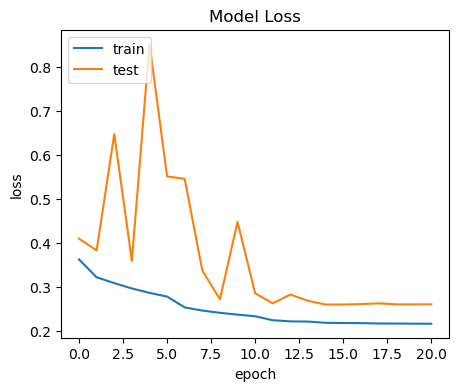

In [63]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


**ResNet Model**

In [64]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
import tensorflow as tf

# Set a random seed for reproducibility
tf.random.set_seed(42)

# Input layer
input_layer = Input(shape=(50, 50, 3))

# Initial Convolutional layer
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_layer)
x = BatchNormalization()(x)
x = ReLU()(x)

# MaxPooling layer
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Residual blocks (you can adjust the number of blocks as needed)
num_blocks = 3  # You can increase this number for a deeper network

for _ in range(num_blocks):
    # First residual block in the block
    residual = x
    
    # Convolutional layer 1
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    # Convolutional layer 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Skip connection
    x = Add()([x, residual])
    x = ReLU()(x)

# Global Average Pooling layer
x = GlobalAveragePooling2D()(x)

# Fully connected layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer (adjust the number of classes according to your dataset)
output_layer = Dense(3, activation='softmax')(x)

# Create the ResNet model
resnet_model = Model(inputs=input_layer, outputs=output_layer, name='ResNet')

# Display the model summary
resnet_model.summary()

# Compile the model
resnet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class classification
                     metrics=['accuracy'])


Model: "ResNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 25, 25, 64)   9472        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 25, 25, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 re_lu (ReLU)                   (None, 25, 25, 64)   0           ['batch_normalization[0][0]'

In [65]:
history_resnet = resnet_model.fit(X_train,
                    y_train,
                    validation_data = (X_test, y_test),
                    epochs = 25,
                    batch_size = 75,
                    callbacks=[early_stopping, plateau])

Epoch 1/25
2665/2665 [==============================] - 265s 99ms/step - loss: 0.3656 - accuracy: 0.8404 - val_loss: 0.8906 - val_accuracy: 0.7372 - lr: 0.0010
Epoch 2/25
2665/2665 [==============================] - 263s 99ms/step - loss: 0.3307 - accuracy: 0.8551 - val_loss: 0.7733 - val_accuracy: 0.6514 - lr: 0.0010
Epoch 3/25
2665/2665 [==============================] - 264s 99ms/step - loss: 0.3212 - accuracy: 0.8593 - val_loss: 0.4797 - val_accuracy: 0.8276 - lr: 0.0010
Epoch 4/25
2665/2665 [==============================] - 267s 100ms/step - loss: 0.3140 - accuracy: 0.8623 - val_loss: 0.7148 - val_accuracy: 0.7823 - lr: 0.0010
Epoch 5/25
2664/2665 [============================>.] - ETA: 0s - loss: 0.3074 - accuracy: 0.8647
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2665/2665 [==============================] - 269s 101ms/step - loss: 0.3074 - accuracy: 0.8647 - val_loss: 0.5166 - val_accuracy: 0.8023 - lr: 0.0010
Epoch 6/25
2665/2665 [============

In [66]:
resnet_model.evaluate(X_test,y_test)

2677/2677 [==============================] - 33s 12ms/step - loss: 0.2797 - accuracy: 0.8766


[0.27973830699920654, 0.8766055107116699]

2677/2677 [==============================] - 32s 12ms/step


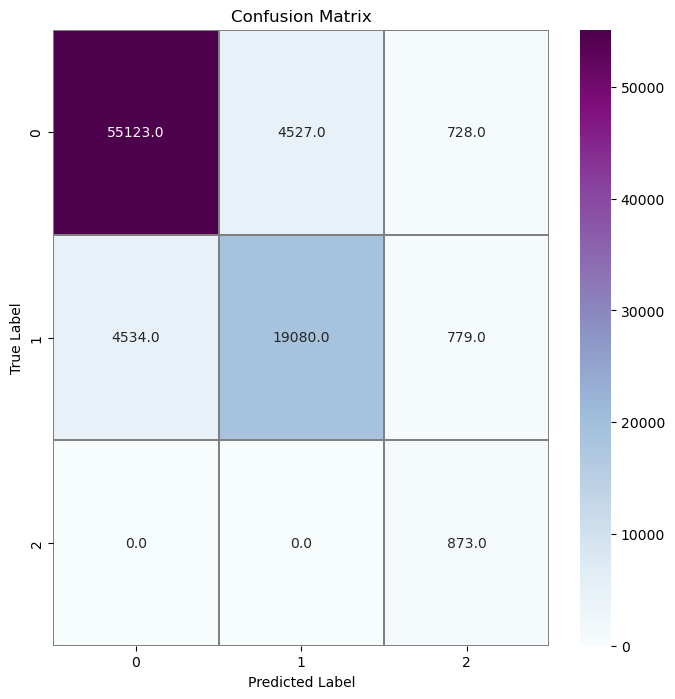

In [67]:
Y_pred = resnet_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

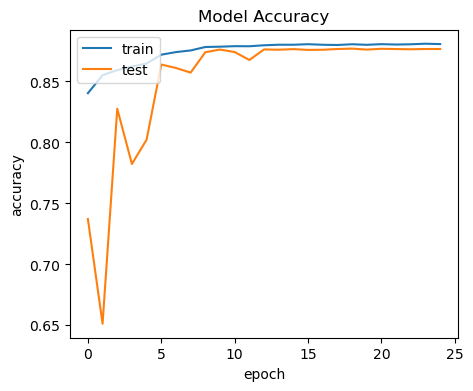

In [68]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

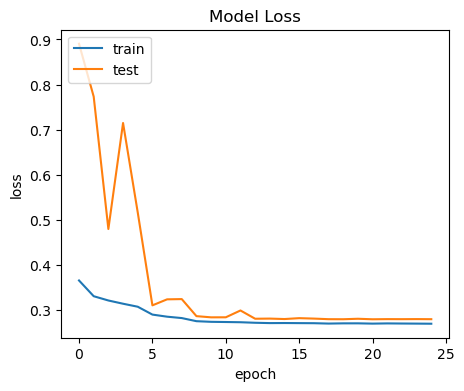

In [69]:
plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**DensNet**

In [70]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, AveragePooling2D, Flatten, Dense, Concatenate
from tensorflow.keras.models import Model

# Set a random seed for reproducibility
tf.random.set_seed(42)

# Input layer
input_layer = Input(shape=(50, 50, 3))

# Initial Convolution Layer
x = Conv2D(64, (7, 7), padding='same', activation='relu')(input_layer)
x = BatchNormalization()(x)

# Define a list to store feature tensors
concatenated_features = []

# Dense Block 1
for _ in range(4):
    # BatchNormalization and ReLU activation
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # 1x1 Convolution Layer
    x = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    # 3x3 Convolution Layer
    feature = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    
    # Append the feature tensor to the list
    concatenated_features.append(feature)

    # Concatenate all previous features along the feature dimension
    x = Concatenate(axis=-1)(concatenated_features)

# Transition Layer 1
x = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
x = AveragePooling2D((2, 2), strides=2)(x)

# Define a new list to store feature tensors for Dense Block 2
concatenated_features = []

# Dense Block 2
for _ in range(4):
    # BatchNormalization and ReLU activation
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    # 1x1 Convolution Layer
    x = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    # 3x3 Convolution Layer
    feature = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    
    # Append the feature tensor to the list
    concatenated_features.append(feature)

    # Concatenate all previous features along the feature dimension
    x = Concatenate(axis=-1)(concatenated_features)

# Transition Layer 2
x = Conv2D(128, (1, 1), padding='same', activation='relu')(x)
x = AveragePooling2D((2, 2), strides=2)(x)

# Global Average Pooling
x = AveragePooling2D((8, 8))(x)

# Flatten the output to prepare for fully connected layers
x = Flatten()(x)

# Fully connected layer with 128 units and ReLU activation
x = Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)

# Output layer with 2 units (binary classification) and softmax activation
output_layer = Dense(3, activation='softmax')(x)

# Create the DenseNet model
densenet_model = Model(inputs=input_layer, outputs=output_layer, name="Dense_Net")

# Display a summary of the model architecture
densenet_model.summary()

# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
densenet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


Model: "Dense_Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d_7 (Conv2D)              (None, 50, 50, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 50, 50, 64)  256         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_8 (BatchNo  (None, 50, 50, 64)  256         ['batch_normalization_7[0

In [71]:
# Training code 
history_densenet = densenet_model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=25,
                    batch_size=75,
                    callbacks=[early_stopping, plateau])

Epoch 1/25
2665/2665 [==============================] - 4888s 2s/step - loss: 0.2612 - accuracy: 0.8271 - val_loss: 0.5715 - val_accuracy: 0.7410 - lr: 0.0010
Epoch 2/25
2665/2665 [==============================] - 4788s 2s/step - loss: 0.2426 - accuracy: 0.8399 - val_loss: 1.4419 - val_accuracy: 0.7630 - lr: 0.0010
Epoch 3/25
2665/2665 [==============================] - 4778s 2s/step - loss: 0.2313 - accuracy: 0.8481 - val_loss: 0.4594 - val_accuracy: 0.7707 - lr: 0.0010
Epoch 4/25
2665/2665 [==============================] - 4856s 2s/step - loss: 0.2235 - accuracy: 0.8537 - val_loss: 0.2797 - val_accuracy: 0.8274 - lr: 0.0010
Epoch 5/25
2665/2665 [==============================] - 4761s 2s/step - loss: 0.2171 - accuracy: 0.8598 - val_loss: 0.4666 - val_accuracy: 0.7618 - lr: 0.0010
Epoch 6/25
2665/2665 [==============================] - ETA: 0s - loss: 0.2131 - accuracy: 0.8620
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
2665/2665 [===================

In [72]:
densenet_model.evaluate(X_test,y_test)

2677/2677 [==============================] - 426s 159ms/step - loss: 0.1890 - accuracy: 0.8764


[0.18901479244232178, 0.8764069676399231]

2677/2677 [==============================] - 413s 154ms/step


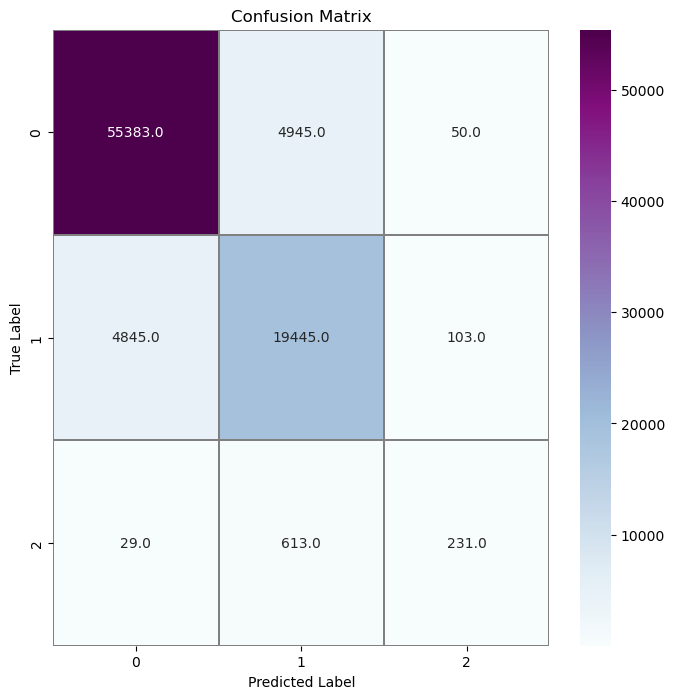

In [73]:
Y_pred = densenet_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

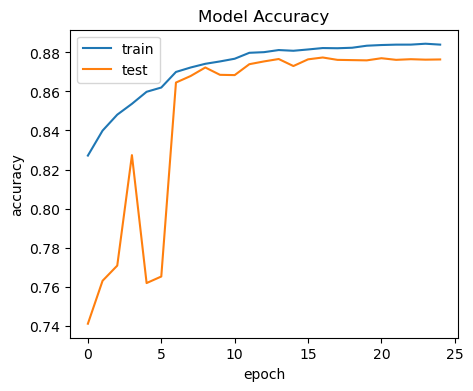

In [74]:
plt.plot(history_densenet.history['accuracy'])
plt.plot(history_densenet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

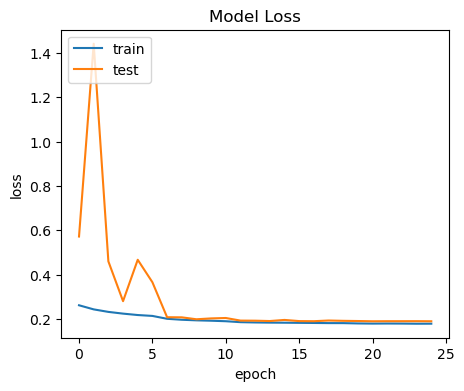

In [75]:
plt.plot(history_densenet.history['loss'])
plt.plot(history_densenet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**VGGNet**

In [76]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Set a random seed for reproducibility
tf.random.set_seed(42)

# Input layer
input_layer = Input(shape=(50, 50, 3))

# Convolution Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolution Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolution Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolution Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Convolution Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2, 2))(x)

# Flatten the output
x = Flatten()(x)

# Fully connected layers
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)

# Output layer with 2 units (binary classification) and softmax activation
output_layer = Dense(3, activation='softmax')(x)

# Create the VGGNet model
vggnet_model = Model(inputs=input_layer, outputs=output_layer, name="VGGNet")

# Display a summary of the model architecture
vggnet_model.summary()

# Compile the model with the Adam optimizer, binary cross-entropy loss, and accuracy metric
vggnet_model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])



Model: "VGGNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 50, 50, 64)        1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_28 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 25, 25, 128)       147584    
                                                            

In [77]:
# Assuming you have X_train, y_train, X_test, and y_test datasets
history_vggnet = vggnet_model.fit(X_train,
                            y_train,
                            validation_data=(X_test, y_test),
                            epochs=25,
                            batch_size=75,
                            callbacks=[early_stopping, plateau])


Epoch 1/25
2665/2665 [==============================] - 3602s 1s/step - loss: 0.3196 - accuracy: 0.7944 - val_loss: 0.2683 - val_accuracy: 0.8218 - lr: 0.0010
Epoch 2/25
2665/2665 [==============================] - 3612s 1s/step - loss: 0.2558 - accuracy: 0.8294 - val_loss: 0.2316 - val_accuracy: 0.8443 - lr: 0.0010
Epoch 3/25
2665/2665 [==============================] - 3596s 1s/step - loss: 0.2381 - accuracy: 0.8429 - val_loss: 0.2336 - val_accuracy: 0.8492 - lr: 0.0010
Epoch 4/25
2665/2665 [==============================] - 3614s 1s/step - loss: 0.2313 - accuracy: 0.8480 - val_loss: 0.2301 - val_accuracy: 0.8428 - lr: 0.0010
Epoch 5/25
2665/2665 [==============================] - 3601s 1s/step - loss: 0.2237 - accuracy: 0.8535 - val_loss: 0.2160 - val_accuracy: 0.8532 - lr: 0.0010
Epoch 6/25
2665/2665 [==============================] - 3625s 1s/step - loss: 0.2202 - accuracy: 0.8561 - val_loss: 0.2365 - val_accuracy: 0.8464 - lr: 0.0010
Epoch 7/25
2665/2665 [========================

In [78]:
vggnet_model.evaluate(X_test,y_test)

2677/2677 [==============================] - 364s 136ms/step - loss: 0.2024 - accuracy: 0.8685


[0.20236928761005402, 0.8685488700866699]

2677/2677 [==============================] - 364s 136ms/step


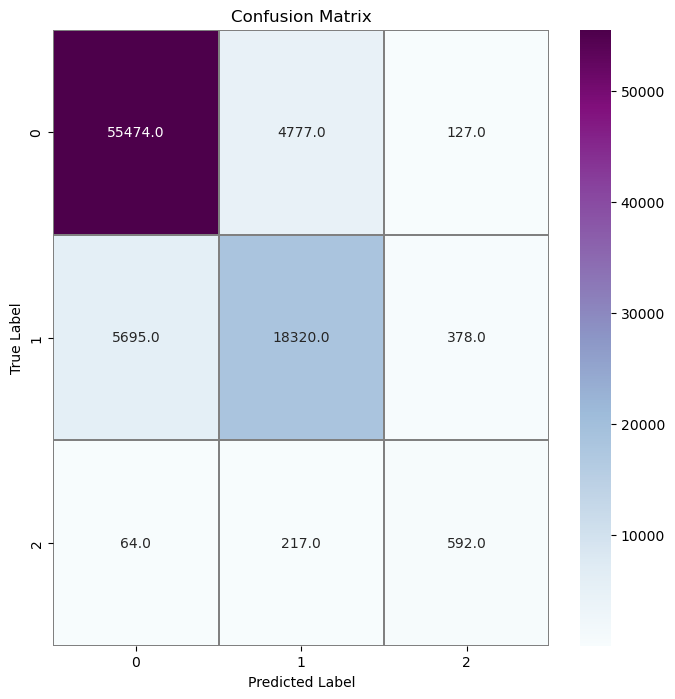

In [79]:
Y_pred = vggnet_model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

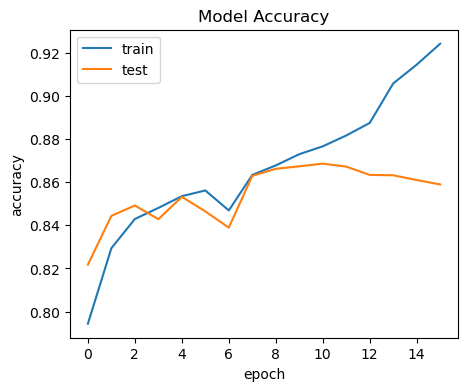

In [80]:
plt.plot(history_vggnet.history['accuracy'])
plt.plot(history_vggnet.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

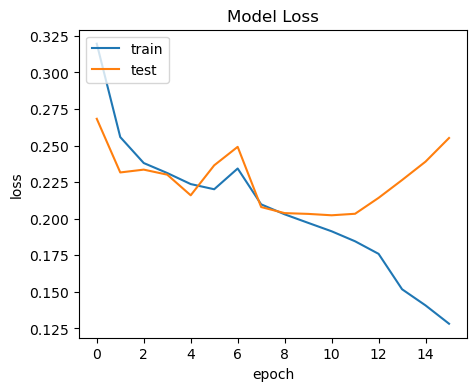

In [81]:
plt.plot(history_vggnet.history['loss'])
plt.plot(history_vggnet.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Models Evaluation** 

In [82]:
cnn_metrics = cnn_model.evaluate(X_test, y_test)
resnet_metrics = resnet_model.evaluate(X_test, y_test)
densenet_metrics = densenet_model.evaluate(X_test, y_test)
vggnet_metrics = vggnet_model.evaluate(X_test, y_test)


2677/2677 [==============================] - 365s 136ms/step - loss: 0.2024 - accuracy: 0.8685


In [83]:
print("CNN Model Metrics:")
print("Accuracy:", (cnn_metrics[1]*100))


print("\nResNet Model Metrics:")
print("Accuracy:", (resnet_metrics[1]*100))


print("\nDenseNet Model Metrics:")
print("Accuracy:", (densenet_metrics[1]*100))


print("\nVGGNet Model Metrics:")
print("Accuracy:", (vggnet_metrics[1]*100))



CNN Model Metrics:
Accuracy: 89.14459943771362

ResNet Model Metrics:
Accuracy: 87.66055107116699

DenseNet Model Metrics:
Accuracy: 87.64069676399231

VGGNet Model Metrics:
Accuracy: 86.85488700866699


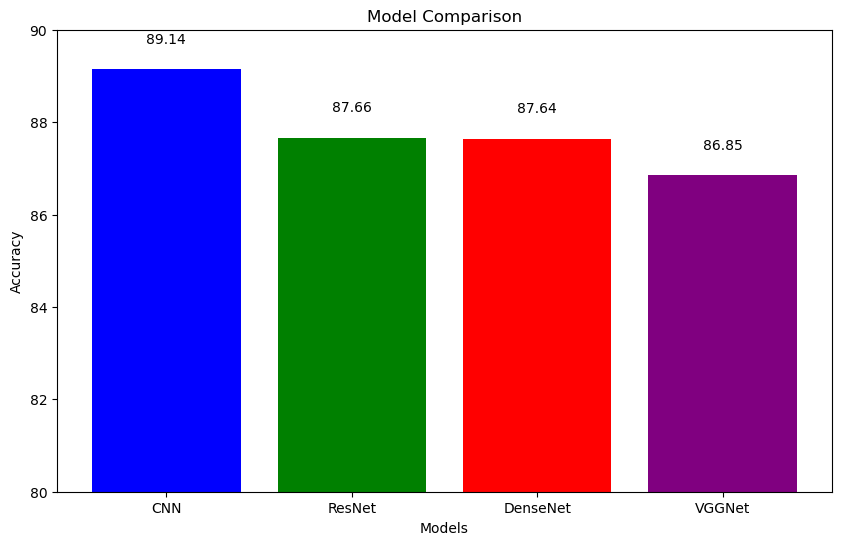

In [84]:
# Create a list of model names
model_names = ['CNN', 'ResNet', 'DenseNet', 'VGGNet']

# Create a list of accuracy scores
accuracy_scores = [cnn_metrics[1]*100, resnet_metrics[1]*100, densenet_metrics[1]*100, vggnet_metrics[1]*100]


# Create a bar plot to compare the accuracy of the models
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores, color=['blue', 'green', 'red', 'purple'])  # Add a color for the fourth model
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')

# Annotate the bars with accuracy values
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy + 0.5, f'{accuracy:.2f}', ha='center', va='bottom')

plt.ylim(80, 90)  # Set the y-axis range to cover a larger range of values
plt.show()

### For Mammographic data **Random Forest Model** has more accuracy as compared to **Decision Tree, KNN and Naive Bayes** 
### For Image dataset **CNN** Model have more accuracy as compared to **ResNet, DenseNet and VGGNet**

# Saving the best models

In [89]:
# Saving Random Forest Model
import joblib

# Save the best_classifier_RF model
joblib.dump(best_classifier_RF, 'RF_model.joblib')

['RF_model.joblib']

In [90]:
# Saving CNN Model
cnn_model.save("cnn_model.h5")

# **Testing The best Model**

1/1 [==============================] - 0s 69ms/step


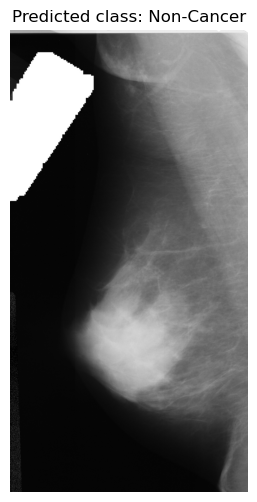

In [87]:
# Testing CNN Model
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("cnn_model.h5")

# Define class labels for interpretation
class_labels = {0: 'Non-Cancer', 1: 'Cancer', 2: 'Malignant'}

# Function to preprocess a new image
def preprocess_new_image(image_path):
    try:
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (50, 50), interpolation=cv2.INTER_LINEAR)
        image = image / 255.0  # Normalize pixel values
        image = np.expand_dims(image, axis=0)  # Add batch dimension
        return image
    except Exception as e:
        print(f"Error preprocessing the image: {e}")
        return None

# Path to the image you want to test
image_path =  '/Users/davissebi/Desktop/Dessertation Code/Test Items/Test Images/Normal/A_0139_1.LEFT_MLO.jpg'

# Preprocess the new image
new_image = preprocess_new_image(image_path)

if new_image is not None:
    # Make predictions using the loaded model
    predictions = loaded_model.predict(new_image)

    # Interpret the predictions
    predicted_class = np.argmax(predictions)
    prediction_label = class_labels[predicted_class]

    # Display the results (image and prediction)
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.imread(image_path, cv2.IMREAD_COLOR))
    plt.title(f'Predicted class: {prediction_label}')
    plt.axis('off')
    plt.show()

In [88]:
# Testing Random Forest Model
# Step 1: Prepare input data
# Example: Create a Pandas DataFrame with your input data
input_data = pd.DataFrame({
    'Score': [5],    
    'Age': [79],
    'Shape': [1],
    'Margin': [4],
    'Density': [3]
    
})

# Step 2: Load the trained Random Forest model
rf_model = joblib.load('RF_model.joblib')  

# Step 3: Make predictions
predictions = rf_model.predict(input_data)

# Step 4: Interpret the predictions
# Example: Assuming binary classification (0: Negative, 1: Positive)
result = ["Negative" if p == 0 else "Positive" for p in predictions]

# Print the results
print(result)

['Positive']
